<a href="https://colab.research.google.com/github/raulsomazabracho/Regression/blob/main/prediccion_precio_casas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MODELO QUE PREDICE EL PRECIO DE UNA CASA EN BOSTON

# Importamos librerias

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Cargar las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Estudiar el dataframe

In [3]:
#cargar los 2 archivos y unirlos en uno solo
train = pd.read_csv(r'/content/drive/MyDrive/Data Science/Python/Regresiones (Supervised)/Precio de casas/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv(r'/content/drive/MyDrive/Data Science/Python/Regresiones (Supervised)/Precio de casas/house-prices-advanced-regression-techniques/test.csv')

data = pd.concat([train,test], keys =['x','y'])
data =data.drop(['Id'], axis = 1)

data.head()

MSSubClass MSZoning  LotFrontage  ...  SaleType SaleCondition SalePrice
x 0          60       RL         65.0  ...        WD        Normal  208500.0
  1          20       RL         80.0  ...        WD        Normal  181500.0
  2          60       RL         68.0  ...        WD        Normal  223500.0
  3          70       RL         60.0  ...        WD       Abnorml  140000.0
  4          60       RL         84.0  ...        WD        Normal  250000.0

[5 rows x 80 columns]

In [4]:
len(data)

2919

In [5]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2919 entries, ('x', 0) to ('y', 1458)
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  

In [7]:
#estadisticas de las columnas
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [8]:
#Ver cuantos nulos hay por columna
data.isna().sum()

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 80, dtype: int64

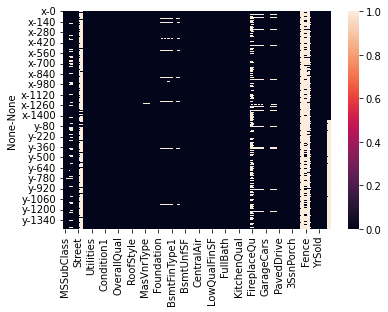

In [9]:
#Visualizar los nulos por columna
sns.heatmap(data.isna())

#Limpieza del Dataframe

## Eliminar los que tienen valores faltantes

In [10]:
#eliminar los que mas tienen valores faltantes
data.drop(['Alley','Fence','MiscFeature','PoolQC'], axis =1, inplace = True)

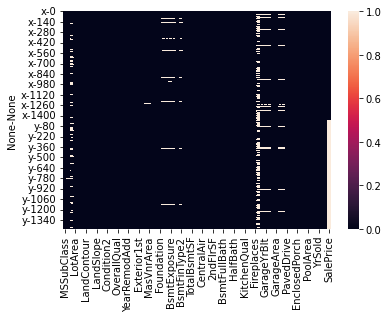

In [11]:
sns.heatmap(data.isna())

In [12]:
data.drop(['FireplaceQu'], axis =1, inplace = True)

In [13]:
data.drop(['LotFrontage'], axis =1, inplace = True)

In [14]:
total_null = data.isnull().sum().sort_values(ascending=False) 
percentage = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_null, percentage], axis=1, keys=['Total', 'Percentage'])
missing_data.head(20)

,Total,Percentage
SalePrice,1459,0.499829
GarageQual,159,0.054471
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471
GarageCond,159,0.054471
GarageType,157,0.053786
BsmtCond,82,0.028092
BsmtExposure,82,0.028092
BsmtQual,81,0.027749
BsmtFinType2,80,0.027407


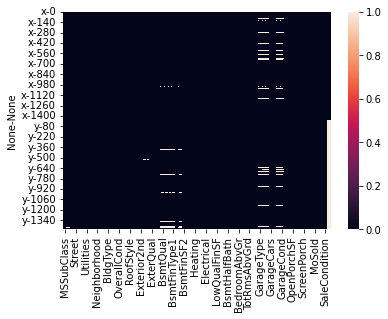

In [15]:
sns.heatmap(data.isna())

In [16]:
#Observamos que todas las variables de garage tienen las mismas faltantes asi que las podemos dropear
data.drop(['GarageFinish', 'GarageQual','GarageYrBlt', 'GarageType' ], axis =1, inplace = True)

In [17]:
data.isnull().sum().sort_values(ascending = False)

SalePrice        1459
GarageCond        159
BsmtCond           82
BsmtExposure       82
BsmtQual           81
                 ... 
EnclosedPorch       0
3SsnPorch           0
Foundation          0
ExterCond           0
MSSubClass          0
Length: 70, dtype: int64

In [18]:
data.drop(['GarageCond' ], axis =1, inplace = True)

In [19]:
#Encontrar columnas numericas

num_col=data._get_numeric_data().columns.tolist()

In [20]:
#Encontrar columnas categoricas utilizando el dataset original menos las numericas encontradas
cat_col=set(data.columns)-set(num_col)
cat_col

{'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Foundation',
 'Functional',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'MasVnrType',
 'Neighborhood',
 'PavedDrive',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street',
 'Utilities'}

## Completar los valores faltantes pertinentes

In [21]:
##Llenar los valores faltantes en la tabla numerica

for col in num_col:
    data[col].fillna(data[col].mean(), inplace = True)
    

In [22]:
##Llenar los valores categoricos faltantes, lleno utilizando mode y el primer valor que encuentra en la tabla en dicha columna

for col in cat_col:

    data[col].fillna(data[col].mode()[0],inplace=True)

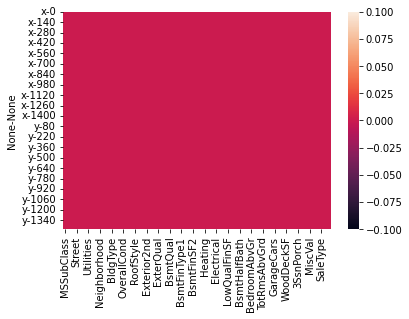

In [23]:
sns.heatmap(data.isna())

In [24]:
data.shape

(2919, 69)

In [25]:
#Encontrar cuantos valores unicos tienen las columnas categoricas
for i in cat_col:
    print(data[i].value_counts())

Unf    2573
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64
RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64
Norm      2889
Feedr       13
Artery       5
PosN         4
PosA         4
RRNn         2
RRAe         1
RRAn         1
Name: Condition2, dtype: int64
Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64
Normal     2402
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: SaleCondition, dtype: int64
VinylSd    1026
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64
GasA     2874
GasW       27
Grav        9
Wall        6
OthW        2
Floor       1
Name: Heating, dtype: int64
TA    1493
Gd    1151
Ex     205
Fa      70
Name: Kitch

## Eliminar info que no aporta al modelo

In [26]:
#Se eliminan las columnas en las cuales un solo valor ocupa mas del 80% del atributo de los registros

data.drop(['Electrical','LandSlope', 'Utilities', 'Heating', 'CentralAir', 'Condition1', 'RoofMatl', 'BsmtCond', 
           'Condition2', 'ExterCond','SaleType', 'Functional' ], axis = 1, inplace = True)

## Analisis Exploratorio de los datos (EDA)

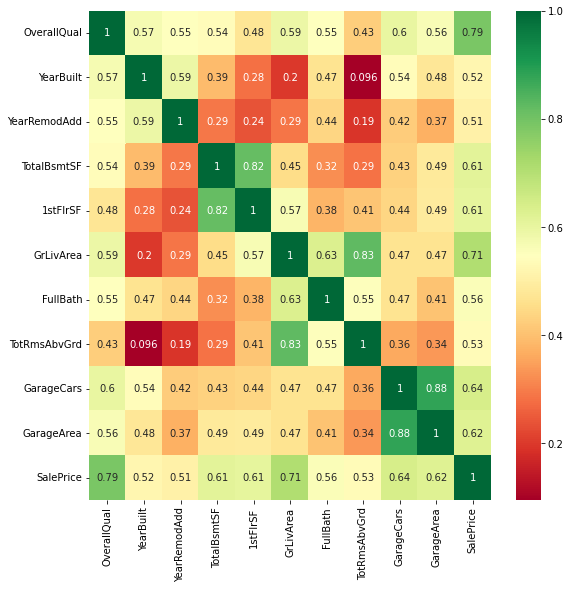

In [27]:
#Observo cuales features tienen mas correlacion con el prrecio de la casa, selesccionando solo mayores a 0.5 en correlacion
correlation = train.corr()
top_corr_features = correlation.index[abs(correlation["SalePrice"])>0.5]
plt.figure(figsize=(9,9))
g = sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [28]:
#Ver la correlacion de todos los atributos con respecto al precio de la casa
variables = train[train.columns[1:]].corr()['SalePrice'][:]
variables.sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [29]:
data.shape

(2919, 57)

In [30]:
#Eliminamos las que tienen menos correlacion cno el preio de la casa
data.drop(['BsmtFinSF2', 'BsmtHalfBath', 'MiscVal', 'LowQualFinSF', 'YrSold', 'OverallCond', 
           'MSSubClass', 'EnclosedPorch', 'KitchenAbvGr'], axis = 1, inplace = True)
data.shape

(2919, 48)

In [31]:

data.describe()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,MoSold,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,10168.114080,6.089072,1971.312778,1984.264474,102.201312,441.423235,560.772104,1051.777587,1159.581706,336.483727,1500.759849,0.429894,1.568003,0.380267,2.860226,6.451524,0.597122,1.766621,472.874572,93.709832,47.486811,2.602261,16.062350,2.251799,6.213087,180921.195890
std,7886.996359,1.409947,30.291442,20.894344,178.626089,455.532750,439.468337,440.690726,392.362079,428.701456,506.051045,0.524556,0.552969,0.502872,0.822693,1.569379,0.646129,0.761494,215.357904,126.526589,67.575493,25.188169,56.184365,35.663946,2.714762,56174.332503
min,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000
25%,7478.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,1126.000000,0.000000,1.000000,0.000000,2.000000,5.000000,0.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,163000.000000
50%,9453.000000,6.000000,1973.000000,1993.000000,0.000000,369.000000,467.000000,990.000000,1082.000000,0.000000,1444.000000,0.000000,2.000000,0.000000,3.000000,6.000000,1.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,6.000000,180921.195890
75%,11570.000000,7.000000,2001.000000,2004.000000,163.500000,733.000000,805.000000,1302.000000,1387.500000,704.000000,1743.500000,1.000000,2.000000,1.000000,3.000000,7.000000,1.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,8.000000,180921.195890
max,215245.000000,10.000000,2010.000000,2010.000000,1600.000000,5644.000000,2336.000000,6110.000000,5095.000000,2065.000000,5642.000000,3.000000,4.000000,2.000000,8.000000,15.000000,4.000000,5.000000,1488.000000,1424.000000,742.000000,508.000000,576.000000,800.000000,12.000000,755000.000000


### Buscar outliers (Datos aberrantes) para eliminarlos

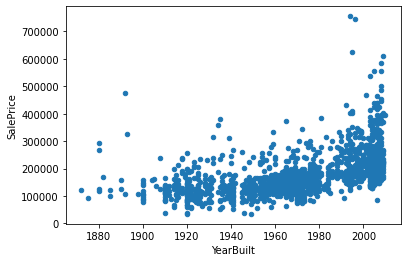

In [32]:
#Precio de venta por el año de construcción

data_year_trend = pd.concat([train['SalePrice'], train['YearBuilt']], axis=1)
data_year_trend.plot.scatter(x = 'YearBuilt', y = 'SalePrice')

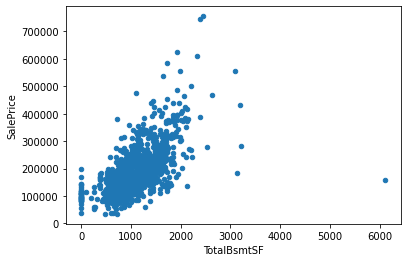

In [33]:
#Precio de la casa con respecto a los metros cuadrados
data_bsmt_trend = pd.concat([train['SalePrice'], train['TotalBsmtSF']], axis = 1)
data_bsmt_trend.plot.scatter(x = 'TotalBsmtSF', y = 'SalePrice')

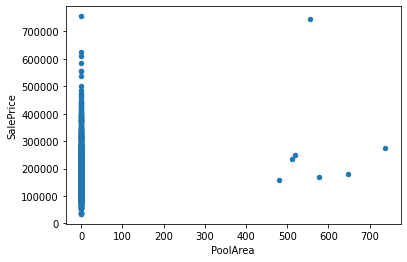

In [34]:
#Precio de la casa por el area de la piscina
data_pool_trend = pd.concat([train['SalePrice'], train['PoolArea']], axis =1)
data_pool_trend.plot.scatter(x='PoolArea', y = 'SalePrice')

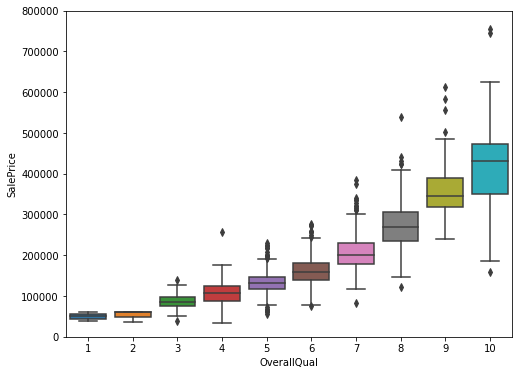

In [35]:
#Precio de la casa por la calidad en general
data_quality_trend = pd.concat([train['SalePrice'], train['OverallQual']], axis =1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data_quality_trend)
fig.axis(ymin=0, ymax=800000);

In [36]:
#Guardamos el precio de la casa en una variable para que no quede normalizada y tocada despues de tanta modificación

precio = train['SalePrice']
precio.shape



(1460,)

In [37]:
#Dropeamos la columna de precio del dataframe
data.drop(['SalePrice'],axis =1, inplace = True)

In [38]:
#Se extraen las variables numericas, será de utilidad luego para mostrar como eliminamos los outliers
n_features = data.select_dtypes(exclude = ['object']).columns

In [39]:
#Creamos funcion para meter las columnas y eliminarles los outliers, esta funciona retorna un nuevo dataframe llamado df1

def mod_outlier(df):
        df1 = df.copy()
        df = df._get_numeric_data()


        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)

        iqr = q3 - q1

        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr)


        for col in df.columns:
            for i in range(0,len(df[col])):
                if df[col][i] < lower_bound[col]:            
                    df[col][i] = lower_bound[col]

                if df[col][i] > upper_bound[col]:            
                    df[col][i] = upper_bound[col]    


        for col in df.columns:
            df1[col] = df[col]

        return(df1)

df = mod_outlier(data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


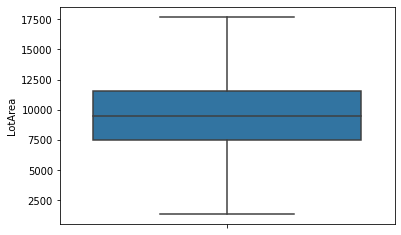

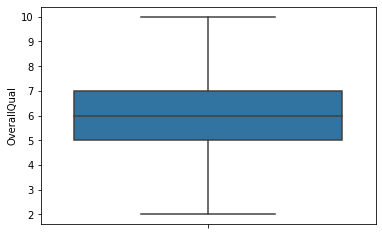

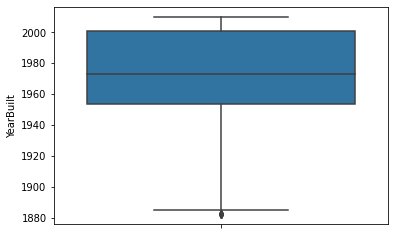

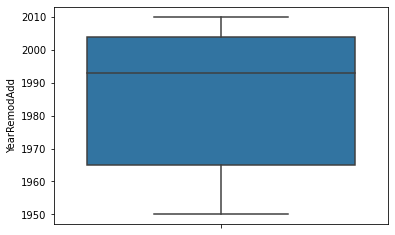

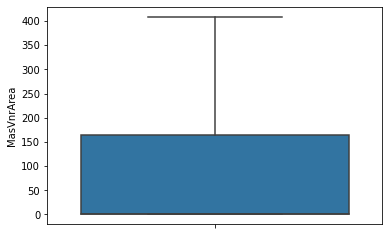

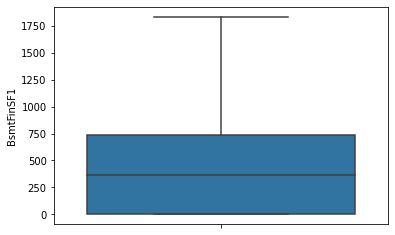

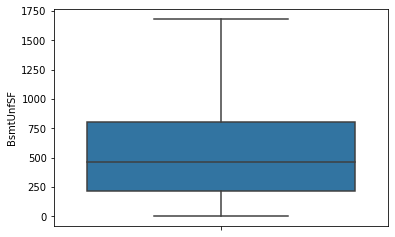

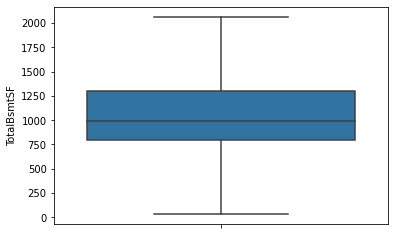

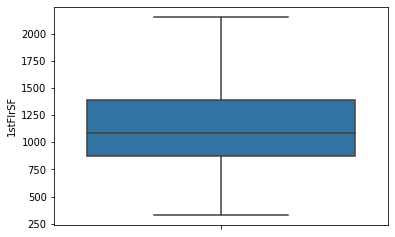

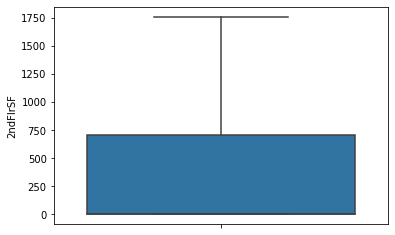

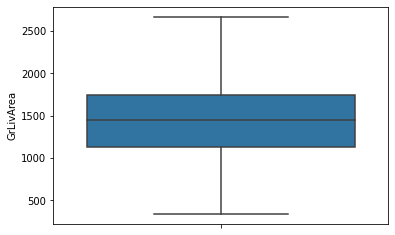

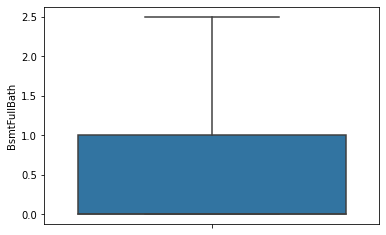

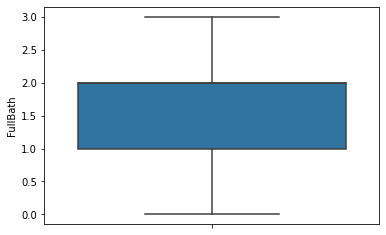

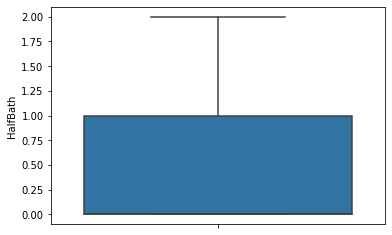

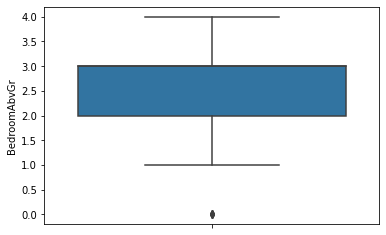

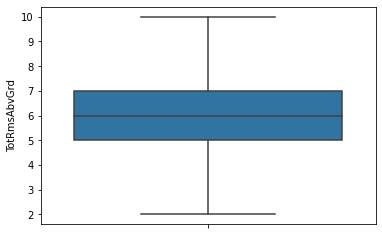

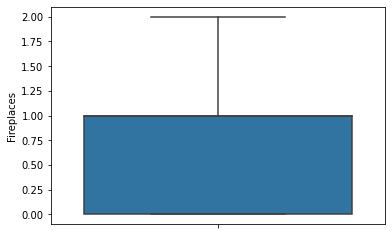

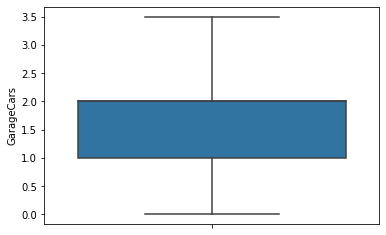

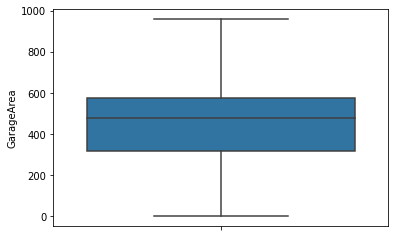

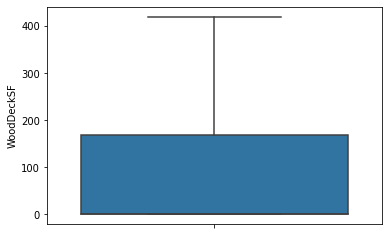

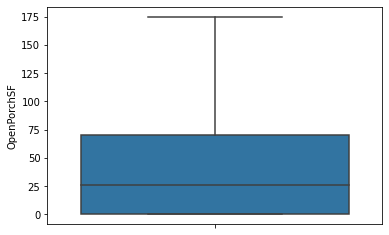

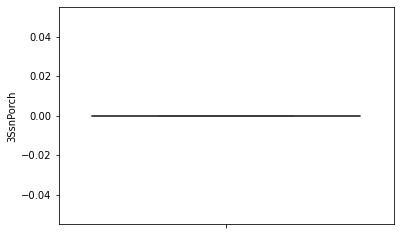

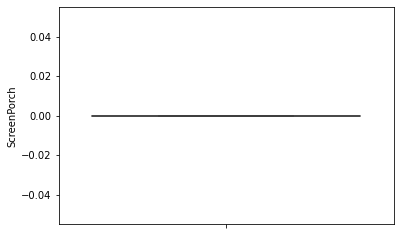

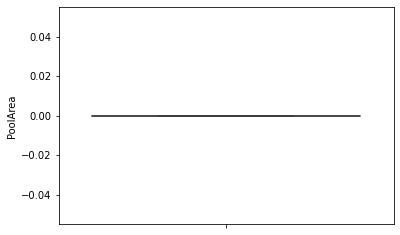

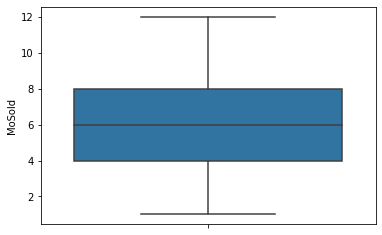

In [40]:
#aca mostramos los graficos y se observa que ya no hay outliers
for i in df[n_features]:
    sns.boxplot(y=df[i])
    plt.show()

In [41]:
#Hacemos get dummies para transformar las variables categoricas en numericas

x=pd.get_dummies(df)
x.shape

(2919, 172)

### Estandarizamos la data para que tenga 0 de media y 1 de varianza cada columna numerica

In [42]:
#Estandarizamos todo el dataframe con maxminsclaer como hice en el fantasy y sus estaditiscas
#en el train set se utliza fit.transform() y en el test set se utliza transform()
from sklearn.preprocessing import MinMaxScaler

scalerX =MinMaxScaler(feature_range = (0,1))
x[x.columns] = scalerX.fit_transform(x[x.columns])

In [43]:
#vemos el test set
train_data = x.loc['x']
train_data.shape

(1460, 172)

In [44]:
#vemos el test set
test_data =x.loc['y']
test_data.shape

(1459, 172)

In [45]:
#insertamos el precio de la casa en el train set
train_data.insert(2,column="SalePrice",value=precio)
train_data.head()

,LotArea,OverallQual,SalePrice,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,MoSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,...,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.434384,0.625,208500,0.945312,0.883333,0.479511,0.385266,0.089153,0.405943,0.286813,0.485227,0.589293,0.4,0.666667,0.5,0.75,0.750,0.0,0.571429,0.570833,0.000000,0.348571,0.0,0.0,0.0,0.090909,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.504643,0.500,181500,0.734375,0.433333,0.000000,0.533697,0.168796,0.605354,0.509890,0.000000,0.397430,0.0,0.666667,0.0,0.75,0.500,0.5,0.571429,0.479167,0.709524,0.000000,0.0,0.0,0.0,0.363636,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.605450,0.625,223500,0.929688,0.866667,0.396330,0.265211,0.257949,0.437377,0.321978,0.492045,0.621842,0.4,0.666667,0.5,0.75,0.500,0.5,0.571429,0.633333,0.000000,0.240000,0.0,0.0,0.0,0.727273,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.501588,0.625,140000,0.257812,0.333333,0.000000,0.117872,0.320951,0.356827,0.344505,0.429545,0.592291,0.4,0.333333,0.0,0.75,0.625,0.5,0.857143,0.668750,0.000000,0.200000,0.0,0.0,0.0,0.090909,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.789345,0.750,250000,0.921875,0.833333,0.856269,0.357435,0.291233,0.547888,0.445604,0.598295,0.798287,0.4,0.666667,0.5,1.00,0.875,0.5,0.857143,0.870833,0.457143,0.480000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Modelos Machine Learning

## Linear regression

In [46]:
#Dividimos en 2 la data

x = train_data.drop(['SalePrice'], axis = True)
y = train_data ['SalePrice']

In [47]:
#Importamosde scikit learn la separacion de data 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=40)


### Entrenamos el modelo

In [48]:
#importamos la regression lineal para que sea nuestro modelo de machine learning

from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(x_train,y_train)

LinearRegression()

### Hacemos las predicciones con linear regression

In [49]:
y_predict = modelo.predict(x_test)

### Evaluamos el modelo de linear regression

In [50]:
score =modelo.score(x_test,y_test)
print(score)

-5.198408076518543e+20


## Lasso Regression

### Entrenamos la data con Lasso Regression

In [51]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, normalize = True)

lasso.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.103e+09, tolerance: 6.

Lasso(alpha=0.1, normalize=True)

### Hacemos predicciones con Lasso

In [52]:
lasso_pred = lasso.predict(x_test)

lasso.score(x_test,y_test)

0.8397373918116507

### Observamos cuales son los features mas importantes pa la toma de desición

In [53]:
lasso_coef = lasso.fit(x,y).coef_


#_ = plt.plot(range(len(data.columns)), lasso_coef)
#_ = plt.xticks(range(len(data)),data, rotation = 60)
#_ = plt.ylabel('coeficientes')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.058e+10, tolerance: 9.